In [1]:
%load_ext autoreload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ESN.ESN import DHESN, EESN_ENCODED, ESN
from Helper.utils import nrmse
from MackeyGlass.MackeyGlassGenerator import run
from MackeyGlass.HenonGenerator import runHenon
import time

hello


In [2]:
data_vae = pd.read_csv("DHESN_RESULTS/DHESN_data_VARIOUS_DHESN_WITH_VAE_GRID_SEARCH_3__2018-03-20.csv", delimiter=',')
data_vae_no_zeros = data_vae.drop(data_vae[data_vae[data_vae.columns[0]] == 0].index)
len(data_vae_no_zeros)

740

In [3]:
data_vae_no_zeros.sort_values(by=[data_vae_no_zeros.columns[-2]])

,# No. res,res sizes (min),(max),echo values (min),(max).1,spectral values (min),(max).2,weightin (min),(max).3,dimsrec (min),(max).4,epochs,reg.,NRMSE (mean),(std)
283,8,100,500,0.50,0.1,0.9,0.3,0.5,1.0,100.0,10.0,4,0.000001,0.3376,0.124019
52,8,100,500,0.50,0.1,0.4,1.2,1.0,0.5,100.0,10.0,2,0.010000,0.3614,0.145792
262,8,100,500,0.50,0.1,1.2,0.4,0.5,1.0,10.0,100.0,2,0.000001,0.3694,0.191668
269,8,100,500,0.50,0.1,0.3,0.9,0.5,1.0,100.0,10.0,4,0.010000,0.3751,0.073126
48,8,100,500,0.50,0.1,0.4,1.2,1.0,0.5,60.0,60.0,2,0.010000,0.3859,0.095853
190,8,100,500,0.40,0.4,0.9,0.3,1.0,0.5,10.0,100.0,2,0.000001,0.3954,0.270699
545,8,100,500,0.40,0.4,1.2,0.4,0.5,0.5,100.0,10.0,4,0.010000,0.3968,0.231874
276,8,100,500,0.50,0.1,0.9,0.3,0.5,1.0,60.0,60.0,2,0.010000,0.4024,0.167912
669,8,500,100,0.50,0.1,0.9,0.3,1.0,0.5,10.0,100.0,4,0.010000,0.4074,0.130122
62,8,100,500,0.50,0.1,1.2,0.4,1.0,0.5,60.0,60.0,2,0.000001,0.4131,0.101720


In [107]:
data_run = runHenon(4100, dimensions=1)
print(data_run)
data = np.array([data_run]).reshape(-1, 1)
print(data)
MEAN_OF_DATA = np.mean(data)
STD_OF_DATA = np.std(data)
# split = 14100
split = 2100
X_train = np.array(data[:split-1])
# X_train -= MEAN_OF_DATA
# X_train /= STD_OF_DATA
y_train = np.array(data[1:split])
# y_train -= MEAN_OF_DATA
# y_train /= STD_OF_DATA
X_valid = np.array(data[split-1:-1])
# X_valid -= MEAN_OF_DATA
# X_valid /= STD_OF_DATA
y_valid = np.array(data[split:])
# y_valid -= MEAN_OF_DATA
# y_valid /= STD_OF_DATA
print(data)

DONE HENON
[[ 0.69716153]
 [ 0.35830173]
 [ 1.02941628]
 ..., 
 [-0.3966225 ]
 [ 1.06209959]
 [-0.69826451]]
[[ 0.69716153]
 [ 0.35830173]
 [ 1.02941628]
 ..., 
 [-0.3966225 ]
 [ 1.06209959]
 [-0.69826451]]
[[ 0.69716153]
 [ 0.35830173]
 [ 1.02941628]
 ..., 
 [-0.3966225 ]
 [ 1.06209959]
 [-0.69826451]]


In [118]:
runs = 1
_errs = []
_times = []
for _ in range(runs):
    n=10
    start_time = time.time()
#     dhesn = DHESN(1, 1, num_reservoirs = n, 
#                   reservoir_sizes=np.linspace(100, 500, n, endpoint=True).astype(int),
#                   echo_params=np.linspace(0.5, 0.1, n, endpoint=True),
#                   regulariser=1e-6,
#                   init_echo_timesteps=100,
#                   dims_reduce=np.linspace(100, 10, n-1, endpoint=True).astype(int).tolist(),
#                   encoder_type='VAE', train_epochs=4)
#     dhesn.initialize_input_weights(scales=np.linspace(0.5, 1.0, n, endpoint=True).tolist(), strategies='uniform')
#     dhesn.initialize_reservoir_weights(spectral_scales=np.linspace(0.9, 0.3, n, endpoint=True).tolist(), 
#                                        strategies=['uniform']*n,
#                                        sparsity=0.1)
    
#     dhesn = EESN_ENCODED(1, 1, num_reservoirs = n, 
#                   reservoir_sizes=np.linspace(50, 250, n, endpoint=True).astype(int),
#                   echo_params=np.linspace(0.85, 0.5, n, endpoint=True),
#                   regulariser=1e-2,
#                   init_echo_timesteps=100,
#                   dims_reduce=np.linspace(50, 5, n, endpoint=True).astype(int).tolist(),
#                   train_epochs=4)
#     dhesn.initialize_input_weights(scales=np.linspace(0.5, 0.5, n, endpoint=True).tolist(), strategies='uniform')
#     dhesn.initialize_reservoir_weights(spectral_scales=np.linspace(0.9, 1.25, n, endpoint=True).tolist(), 
#                                        strategies=['uniform']*n,
#                                        sparsity=1.0)
    start_time = time.time()
    dhesn = ESN(1, 1, 
                  reservoir_size=500,
                  echo_param=0.1,
                  regulariser=1e-8,
                  init_echo_timesteps=500
                  )
    dhesn.initialize_input_weights(scale=1., strategy='uniform', sparsity=1.)
    dhesn.initialize_reservoir_weights(spectral_scale=1.4, 
                                       strategy='binary',
                                       sparsity=1.0)
#     dhesn.initialize_input_weights(scale=0.1, strategy='uniform', sparsity=0.1)
#     dhesn.initialize_reservoir_weights(spectral_scale=0., 
#                                        strategy='binary',
#                                        sparsity=0.2)

#     dhesn = DHESN(1, 1, num_reservoirs = n, 
#                   reservoir_sizes=np.linspace(100, 500, n, endpoint=True).astype(int),
#                   echo_params=np.linspace(0.5, 0.1, n, endpoint=True),
#                   regulariser=1e-6,
#                   init_echo_timesteps=100,
#                   dims_reduce=np.linspace(100, 10, n-1, endpoint=True).astype(int).tolist(),
#                   encoder_type='VAE', train_epochs=4, encode_norm=True)
#     dhesn.initialize_input_weights(scales=np.linspace(0.5, 1.0, n, endpoint=True).tolist(), strategies='uniform')
#     dhesn.initialize_reservoir_weights(spectral_scales=np.linspace(0.9, 0.3, n, endpoint=True).tolist(), 
#                                        strategies=['uniform']*n,
#                                        sparsity=0.1)
    
#     start_time = time.time()
#     dhesn = DHESN(1, 1, num_reservoirs = n, 
#                   reservoir_sizes=np.linspace(200, 400, n, endpoint=True).astype(int),
#                   echo_params=np.linspace(0.5, 0.1, n, endpoint=True),
#                   regulariser=1e-6,
#                   init_echo_timesteps=100,
#                   dims_reduce=np.linspace(30, 80, n-1, endpoint=True).astype(int).tolist(),
#                   encoder_type='PCA', encode_norm=True)
#     dhesn.initialize_input_weights(scales=np.linspace(0.4, 1.2, n, endpoint=True).tolist(), strategies='uniform')
#     dhesn.initialize_reservoir_weights(spectral_scales=np.linspace(0.5, 0.5, n, endpoint=True).tolist(), 
#                                        strategies=['uniform']*n,
#                                        sparsity=0.1)
#     dhesn = DHESN(1, 1, num_reservoirs = n, 
#                   reservoir_sizes=np.linspace(300, 300, n, endpoint=True).astype(int),
#                   echo_params=np.linspace(0.5, 0.1, n, endpoint=True),
#                   regulariser=1e-6,
#                   init_echo_timesteps=100,
#                   dims_reduce=np.linspace(60, 60, n-1, endpoint=True).astype(int).tolist(),
#                   encoder_type='PCA')
#     dhesn.initialize_input_weights(scales=np.linspace(0.5, 0.5, n, endpoint=True).tolist(), strategies='uniform')
#     dhesn.initialize_reservoir_weights(spectral_scales=np.linspace(1.2, 0.4, n, endpoint=True).tolist(), 
#                                        strategies=['uniform']*n,
#                                        sparsity=0.1)
    dhesn.train(X_train, y_train)
    #     generate

    outs = []
    u_n = np.array(X_valid[0])
    print(u_n)
    for i in range(len(data[split:])):
#         if i % 2 == 0:
#             u_n = np.array(X_valid[i])
        u_n = np.array(dhesn.forward(u_n))
        outs.append(u_n)

    outs = np.array(outs).squeeze()
    y_vals = y_valid.squeeze()

    err = nrmse(y_vals, outs, MEAN_OF_DATA)
    _errs.append(err)
    print("NRMSE: {}".format(err))
    
    total_time = time.time() - start_time
    _times.append(total_time)
    print("TIME: {}".format(total_time))

[ 0.60278589]
NRMSE: 1.43360170858
TIME: 0.762866973877


<IPython.core.display.Javascript object>


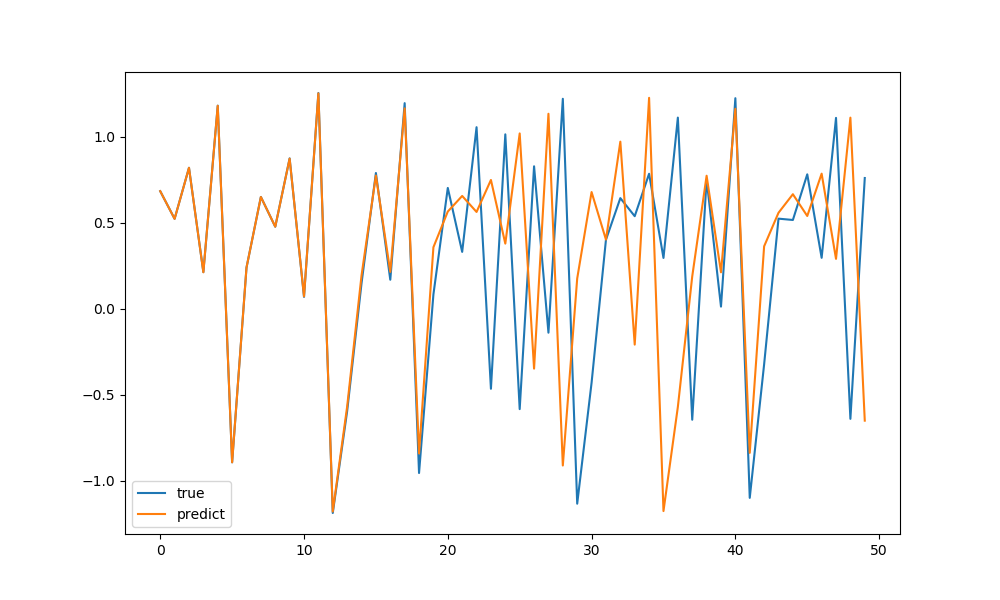

In [119]:
%matplotlib notebook

fg, ag = plt.subplots(figsize=(10, 6))
num = 50
ag.plot(range(len(y_vals[:num])), y_vals[:num], label="true")
ag.plot(range(len(outs[:num])), outs[:num], label="predict")
ag.legend()
plt.show()

<IPython.core.display.Javascript object>


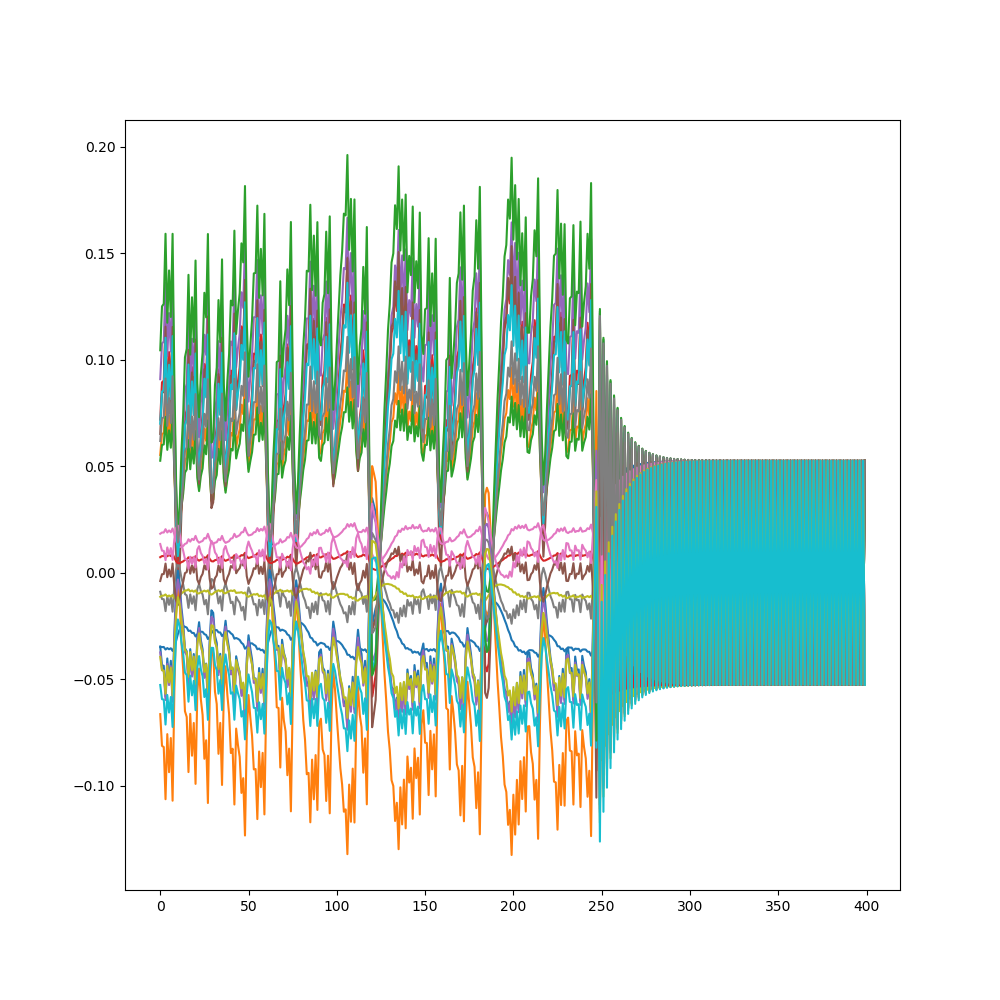

(1000, 500)


In [93]:
%matplotlib notebook

# plot the encoded data
fig, axs4 = plt.subplots(figsize=(10, 10), sharey=True)
e = np.array(dhesn.reservoir.signals[-1000:])[:, 0, :]
#     e = np.array([a[0] for a in r.signals[14100:]])
#     print(e.shape)
#     e = np.array(r.signals[:][0][:])
#     print(np.shape(e))
#     encoder_signal = np.array(dhesn.encoder_signals[0])
print(np.shape(e))
num = 400
num_signals = 20
axs4.plot(range(num), e[:num, :num_signals])
plt.show()

<IPython.core.display.Javascript object>


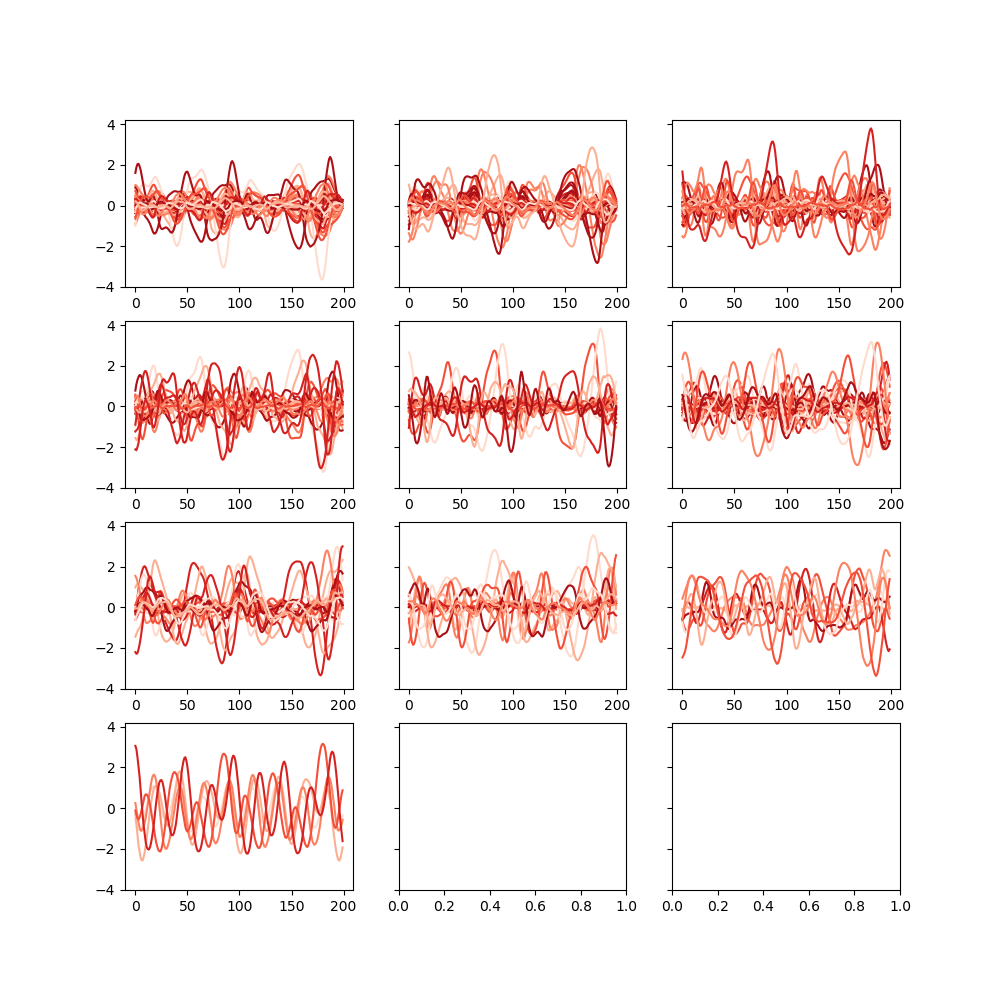

(1000, 50)
(1000, 50)
(1000, 45)
(1000, 45)
(1000, 40)
(1000, 40)
(1000, 35)
(1000, 35)
(1000, 30)
(1000, 30)
(1000, 25)
(1000, 25)
(1000, 20)
(1000, 20)
(1000, 15)
(1000, 15)
(1000, 10)
(1000, 10)
(1000, 5)
(1000, 5)


In [57]:
%matplotlib notebook

sns.set_palette("Reds")

# plot the encoded data
fig, axs = plt.subplots(4, 3, figsize=(10, 10), sharey=True)
for idx, e in enumerate(dhesn.encoder_signals):
    e = np.array(e)
    print(np.shape(e))
    row = idx // 3
    col = idx % 3
#     encoder_signal = np.array(dhesn.encoder_signals[0])
    print(np.shape(e))
    num = 200
    axs[row, col].plot(range(num), e[:num, :])
plt.show()

<IPython.core.display.Javascript object>


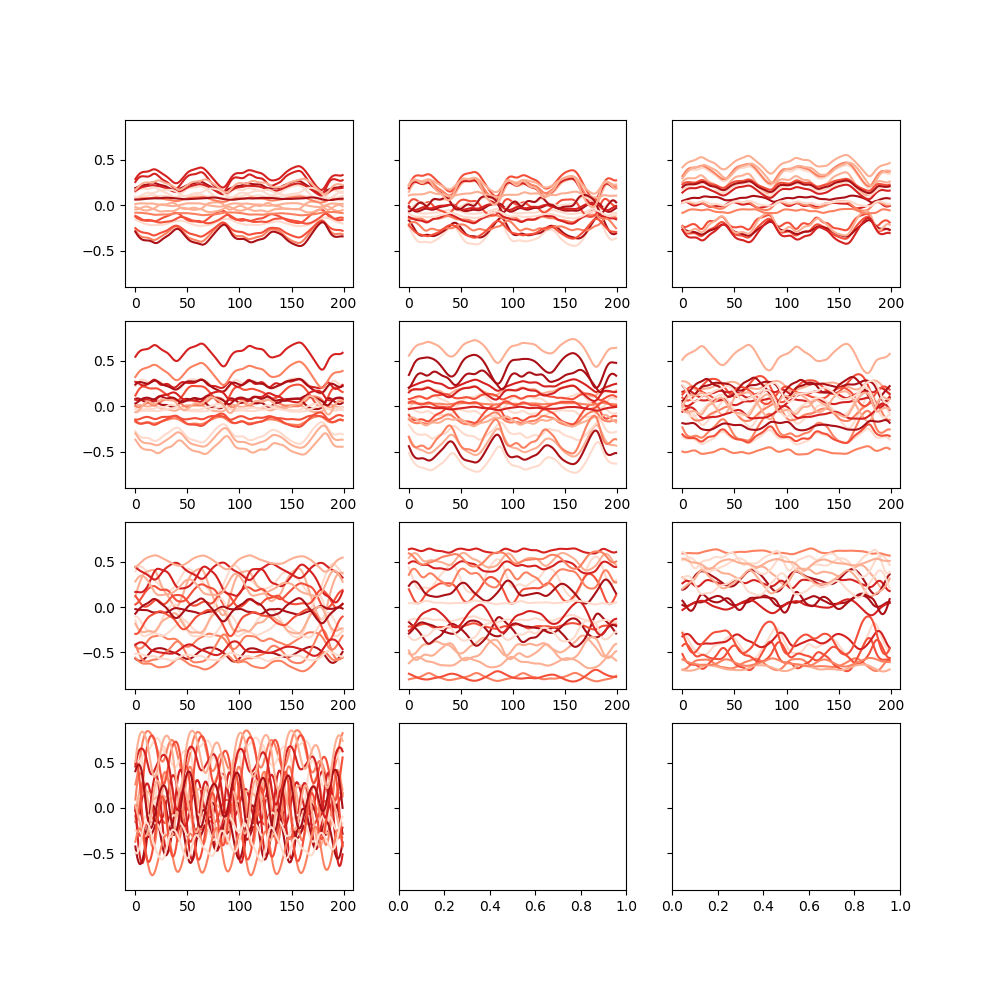

(1000, 50)
(1000, 72)
(1000, 94)
(1000, 116)
(1000, 138)
(1000, 161)
(1000, 183)
(1000, 205)
(1000, 227)
(1000, 250)


In [58]:
%matplotlib notebook

# plot the encoded data
fig, axs4 = plt.subplots(4, 3, figsize=(10, 10), sharey=True)
for idx, r in enumerate(dhesn.reservoirs):
    e = np.array(r.signals[-1000:])[:, 0, :]
#     e = np.array([a[0] for a in r.signals[14100:]])
#     print(e.shape)
#     e = np.array(r.signals[:][0][:])
#     print(np.shape(e))
    row = idx // 3
    col = idx % 3
#     encoder_signal = np.array(dhesn.encoder_signals[0])
    print(np.shape(e))
    num = 200
    num_signals = 20
    axs4[row, col].plot(range(num), e[:num, :num_signals])
plt.show()

<IPython.core.display.Javascript object>


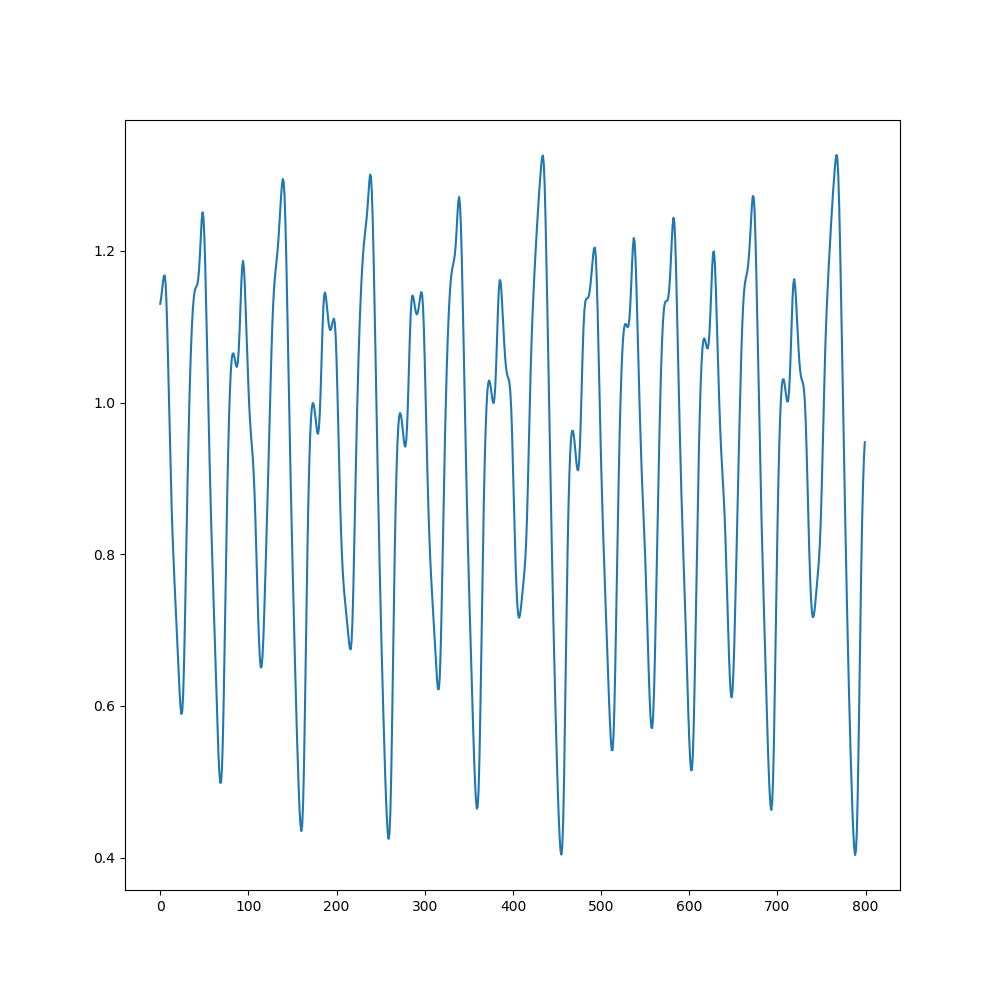

In [14]:
fig, ax3 = plt.subplots(figsize=(10, 10))
ax3.plot(range(800), data[:800])
plt.show()

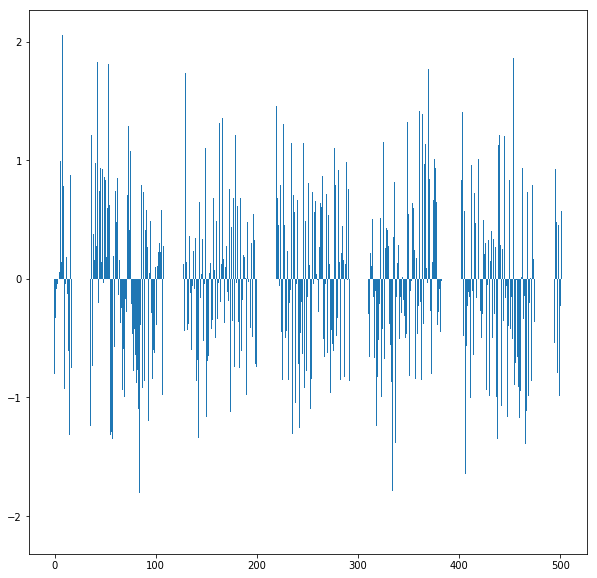

In [36]:
fig, ax2 = plt.subplots(figsize=(10, 10))
w = dhesn.W_out.flatten()
ax2.bar(range(len(w)), w)
plt.show()

<IPython.core.display.Javascript object>


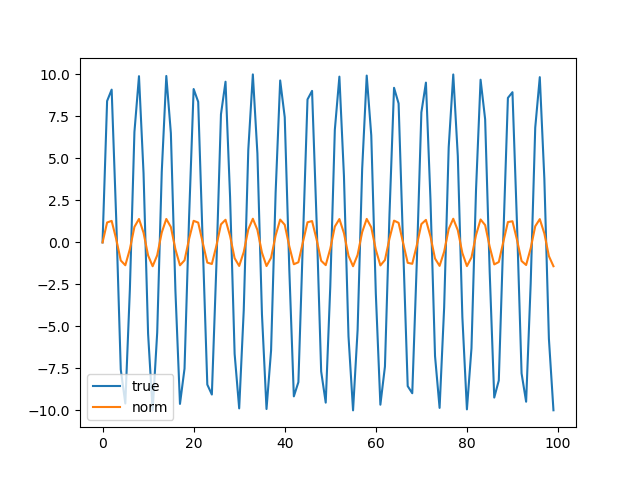

In [36]:
%matplotlib notebook
f, axx = plt.subplots()
a = np.sin(range(100))*10
b = (a - np.mean(a))/np.std(a)
axx.plot(range(len(a)), a, label='true')
axx.plot(range(len(b)), b, label='norm')
plt.legend()
plt.show()